In [2]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data (housing_url = HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


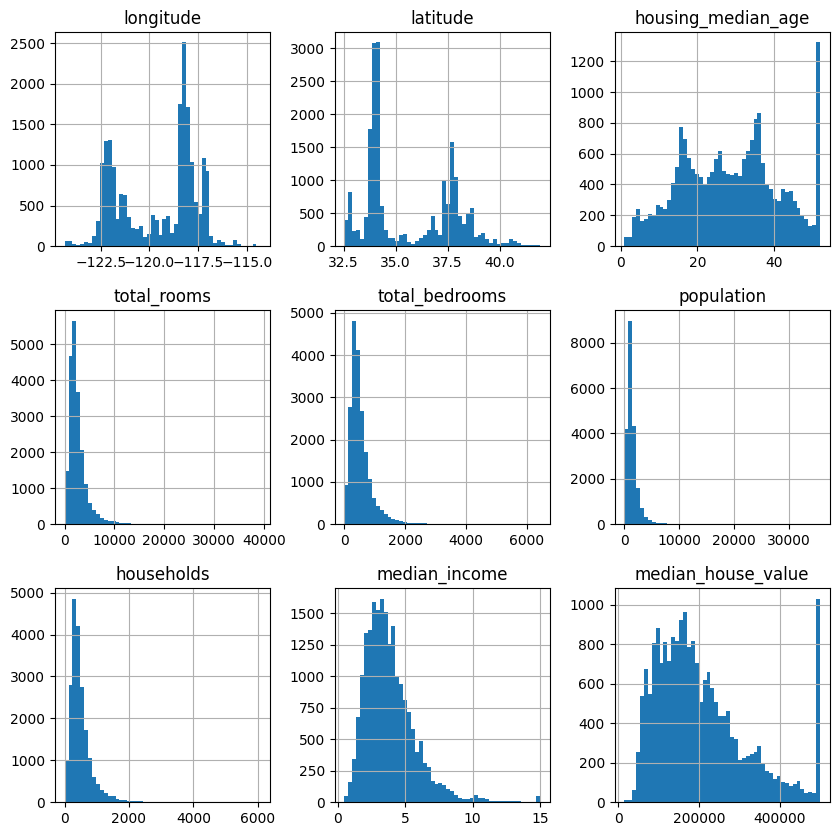

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(10,10))
plt.show()

<Axes: >

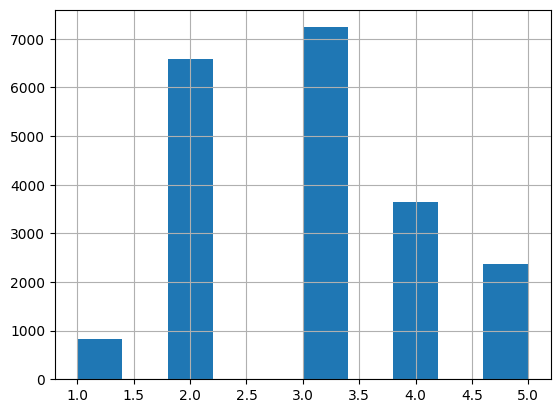

In [9]:
import numpy as np
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5 )
housing["income_cat"].where(housing["income_cat"] < 5, 5.0).hist()


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits= 1, test_size=0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set["income_cat"].value_counts() / len (strat_test_set)

income_cat
3.0     0.350533
2.0     0.318798
4.0     0.176357
5.0     0.069041
1.0     0.039729
6.0     0.025678
7.0     0.009205
8.0     0.005087
11.0    0.002422
9.0     0.002422
10.0    0.000727
Name: count, dtype: float64

In [11]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

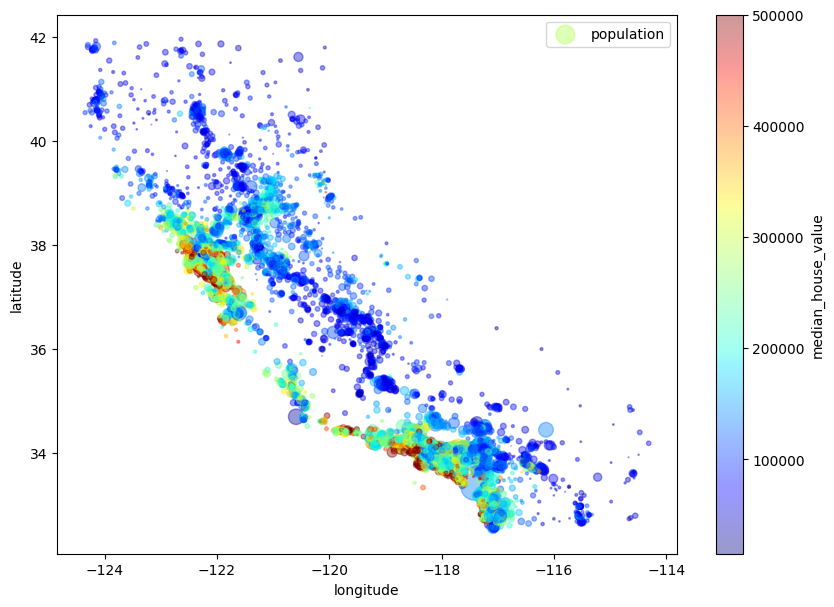

In [12]:
housing = strat_train_set.copy()
housing.plot(kind="scatter", x = "longitude", y="latitude", alpha=0.4,
                s=housing["population"] / 100, label="population", figsize=(10, 7),
                 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()

In [13]:
numeric_housing = housing.select_dtypes(include=['number'])
numeric_housing = numeric_housing.fillna(0)
corr_matrix = numeric_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687474
total_rooms           0.135989
housing_median_age    0.111770
households            0.065841
total_bedrooms        0.049225
population           -0.024765
longitude            -0.045056
latitude             -0.144684
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

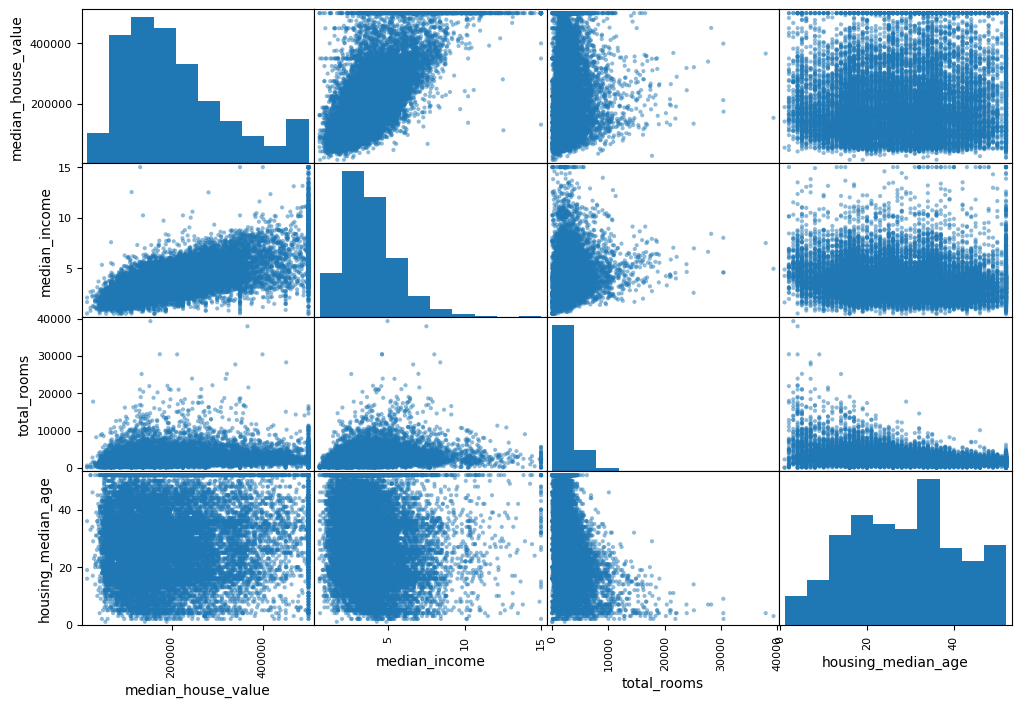

In [14]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


<Axes: xlabel='median_income', ylabel='median_house_value'>

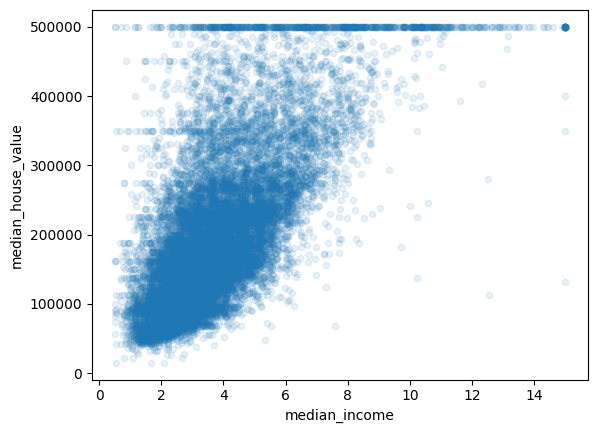

In [15]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [16]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

numeric_housing = housing.select_dtypes(include = ['number'])
numeric_housing.fillna(0)

corr_matrix = numeric_housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)


median_house_value          1.000000
median_income               0.687474
rooms_per_household         0.145750
total_rooms                 0.135989
housing_median_age          0.111770
households                  0.065841
total_bedrooms              0.049177
population_per_household   -0.021844
population                 -0.024765
longitude                  -0.045056
latitude                   -0.144684
bedrooms_per_room          -0.259679
Name: median_house_value, dtype: float64

In [17]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = "median")
housing_num = housing.drop("ocean_proximity", axis = 1)
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [19]:
imputer.statistics_
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2122.    ,  434.    , 1166.    ,
        408.    ,    3.5409])

In [20]:
x = imputer.transform(housing_num)
housing_tr = pd.DataFrame(x, columns=housing_num.columns)

In [21]:
housing_cat = housing["ocean_proximity"]
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 1, 2, 3, 0, 3, 2, 3, 0, 0])

In [22]:
housing_categories

Index(['<1H OCEAN', 'NEAR BAY', 'NEAR OCEAN', 'INLAND', 'ISLAND'], dtype='object')

In [23]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot
ord_encoder = OrdinalEncoder()
housing_cat_ord = ord_encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_ord
ord_encoder.categories_

[array([0, 1, 2, 3, 4])]

In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4,5,6 
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:,household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipelines = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
     ('attribs_adder', CombinedAttributesAdder()),
     ('std_scaler', StandardScaler()),
])
housing_num_tr = num_pipelines.fit_transform(housing_num)

In [26]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attributes].values

# print(DataFrameSelector(housing_num))
# print(housing_num)
        

In [27]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
     ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    # ('imputer', SimpleImputer(strategy="most_frequent")),
    ('ord_encoder', OrdinalEncoder()),
])

In [28]:
from sklearn.pipeline import FeatureUnion
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

In [29]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape
# housing.info()

(16512, 12)

In [30]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [31]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ",  lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

Predictions:  [205751.58799301 672517.8136009  205634.6502193   68844.74864808
 182686.81982145]
Labels:  [286600.0, 500001.0, 196900.0, 46300.0, 254500.0]


In [32]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(69052.39010680208)

In [33]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [34]:
print("Predictions: ",  tree_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))
housing_predictions = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Predictions:  [286600. 500001. 196900.  46300. 254500.]
Labels:  [286600.0, 500001.0, 196900.0, 46300.0, 254500.0]


np.float64(0.0)

In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("STD: ", scores.std())

display_scores(tree_rmse_scores)

Scores:  [70058.13934109 70841.74716625 69672.65113871 72550.6276935
 74279.95445015 73343.09608431 69992.25512171 72278.07869781
 72777.72630297 75351.2327799 ]
Mean:  72114.55087763842
STD:  1834.3113961689621


In [36]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores:  [67198.94727831 67196.82401646 68440.31269489 74621.48379858
 72152.96813671 70246.94729475 66483.89219642 68594.36990019
 70335.09759826 67938.6734057 ]
Mean:  69320.95163202738
STD:  2414.1206397138935


In [37]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
# housing_predict_for


# display_scores(forest_rmse_scores)

RandomForestRegressor()

In [39]:
forest_reg_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_reg_scores)
print(forest_rmse_scores)

[50091.6286053  48061.24909853 50048.42086362 52557.40620087
 52484.9723423  53288.41654069 49186.85322041 49204.71395595
 52959.26025484 52104.68265417]


In [40]:
print("Mean RMSE: ", forest_rmse_scores.mean())
print("Standard Deviation RMSE: ", forest_rmse_scores.std())

Mean RMSE:  50998.76037366791
Standard Deviation RMSE:  1783.366700098708


In [43]:
import joblib
joblib.dump(forest_reg, "forest_reg_model.pk")

['forest_reg_model.pk']

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2,3,4]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [47]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63933.96301028903 {'max_features': 2, 'n_estimators': 3}
54801.24821050533 {'max_features': 2, 'n_estimators': 10}
52715.596501729866 {'max_features': 2, 'n_estimators': 30}
60022.35932132144 {'max_features': 4, 'n_estimators': 3}
52839.5836872558 {'max_features': 4, 'n_estimators': 10}
50300.03685921073 {'max_features': 4, 'n_estimators': 30}
58746.823081184884 {'max_features': 6, 'n_estimators': 3}
52552.796488206826 {'max_features': 6, 'n_estimators': 10}
50683.875540121895 {'max_features': 6, 'n_estimators': 30}
60499.78694985249 {'max_features': 8, 'n_estimators': 3}
53185.21887877045 {'max_features': 8, 'n_estimators': 10}
50860.322367329616 {'max_features': 8, 'n_estimators': 30}
61269.03234503933 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53985.71575906461 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60434.806415242405 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51813.05332856483 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [48]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.0917598 , 0.08586706, 0.04553118, 0.01970554, 0.01814977,
       0.01907572, 0.01770076, 0.35402069, 0.05004038, 0.11030995,
       0.09407347, 0.09376568])

In [51]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["ord_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.35402069297609223), 'median_income'),
 (np.float64(0.11030995463550415), 'pop_per_hhold'),
 (np.float64(0.0940734710130222), 'bedrooms_per_room'),
 (np.float64(0.0937656799665339), '<1H OCEAN'),
 (np.float64(0.0917598039387076), 'longitude'),
 (np.float64(0.08586706067015747), 'latitude'),
 (np.float64(0.05004038452165546), 'rooms_per_hhold'),
 (np.float64(0.04553117703461556), 'housing_median_age'),
 (np.float64(0.019705537019996826), 'total_rooms'),
 (np.float64(0.019075717718582644), 'population'),
 (np.float64(0.018149765033371314), 'total_bedrooms'),
 (np.float64(0.01770075547176053), 'households')]

In [56]:
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(x_test)
final_prediction = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)
display_scores(final_rmse)

Scores:  48059.224497460775
Mean:  48059.224497460775
STD:  0.0


In [57]:
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']